In [7]:
def read_file(file_name):
    with open(file_name, 'r') as file:
        problem = []
        for line in file:
            if line.strip():
                row = list(map(int, line.split()))
                problem.append(row)
    return problem

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from GA import genetic_algorithm

def solve(problem, 
          population_size=100, 
          generations=100, 
          mutation_rate=0.1, 
          mutation_algorithm='swap', 
          crossover_algorithm='order', 
          selection_algorithm='elitism'):
    n_cities = len(problem)
    
    solution = genetic_algorithm(n_cities, problem, 
                                 population_size=population_size, 
                                 generations=generations, 
                                 mutation_rate=mutation_rate, 
                                 mutation_algorithm=mutation_algorithm, 
                                 crossover_algorithm=crossover_algorithm, 
                                 selection_algorithm=selection_algorithm)
    
    return solution['distance'], solution['route'], solution['fitness']

def calculate_deviation(original_result, computed_result):
    return round(abs(computed_result - original_result))

def plot_deviation_frequency(deviation_list, bins=10):

    counts, bin_edges = np.histogram(deviation_list, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

    # Đảm bảo luôn có tạo độ 0
    if 0 not in bin_centers:
        bin_centers = np.insert(bin_centers, 0, 0)
        counts = np.insert(counts, 0, 0)

    # Vẽ tần số
    plt.figure(figsize=(10, 6))
    plt.plot(bin_centers, counts, marker='o', color='b', linestyle='-')
    
    plt.xlabel('Độ lệch')
    plt.ylabel('Tần số')
    plt.title('Đồ thị tần số giao động của độ lệch')
    plt.grid(True)
    plt.show()



# Thông tin chung

Đồ thị tần số giao động của **độ lệch** giúp bạn đánh giá mức độ sai lệch của các kết quả tính toán so với kết quả gốc qua nhiều lần thử nghiệm.

### Các trục của đồ thị
- **Trục X (Độ lệch)**: Hiển thị các giá trị độ lệch (sự khác biệt) giữa kết quả tính toán và kết quả gốc.
- **Trục Y (Tần số)**: Hiển thị tần suất xuất hiện của mỗi giá trị độ lệch trong danh sách. Tần suất càng cao cho thấy giá trị độ lệch đó xuất hiện nhiều lần.

### Ý nghĩa của đường đồ thị gần giá trị 0
Khi các điểm trên đồ thị tập trung gần giá trị 0, điều này cho thấy:
- Hầu hết các kết quả tính toán có độ lệch thấp.
- Kết quả càng gần 0 thì thuật toán càng chính xác, vì sai số giữa kết quả tính toán và kết quả gốc là nhỏ.

**3 Cities - 6**

Tất cả 1000 kết quả trả về đều gần sát với đáp án. Độ lệch dưới 0,1 và lệch phải

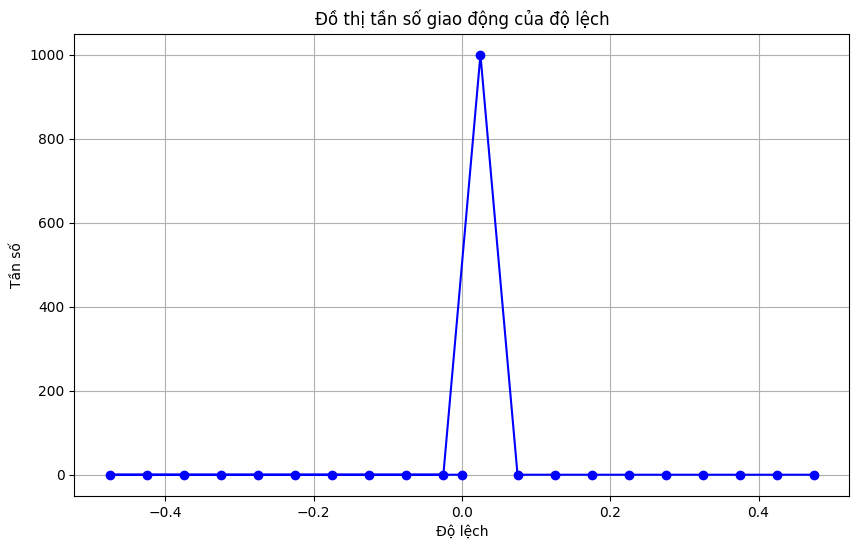

In [9]:
problem = read_file('data/3Cities-6.txt')
original_result = 6
deviation_list = []

for _ in range(1000): 
    distance = solve(problem)[0] # Note: sửa vậy sẽ tối ưu hơn
    deviation_list.append(calculate_deviation(original_result, distance))

plot_deviation_frequency(deviation_list,bins=20)

**4 Cities - 189**

Tất cả 1000 kết quả trả về đều gần sát với đáp án. Độ lệch dưới 0,1 và lệch phải.

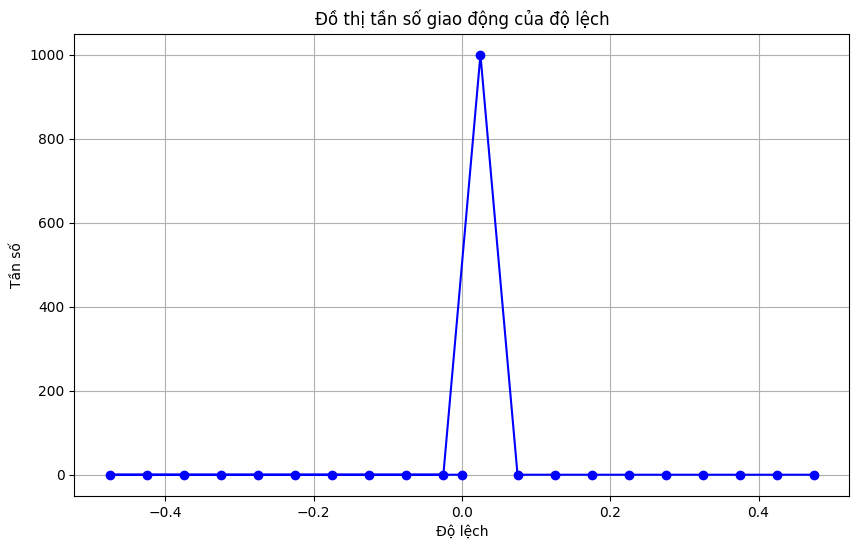

In [10]:
problem = read_file('data/4Cities-189.txt')
original_result = 189
deviation_list = []

for _ in range(1000): 
    distance = solve(problem)[0]
    deviation_list.append(calculate_deviation(original_result, distance))

plot_deviation_frequency(deviation_list,bins=20)

**15 Cities - 1194**

Tầm 40% kết quả trả về có độ lệch < 100. 60% còn lại độ lệch trả dài từ 100 đến 400. Đồ thị có xu hướng lệch phải. Cao nhất ở gần 0 và hạ dần về bên phải.

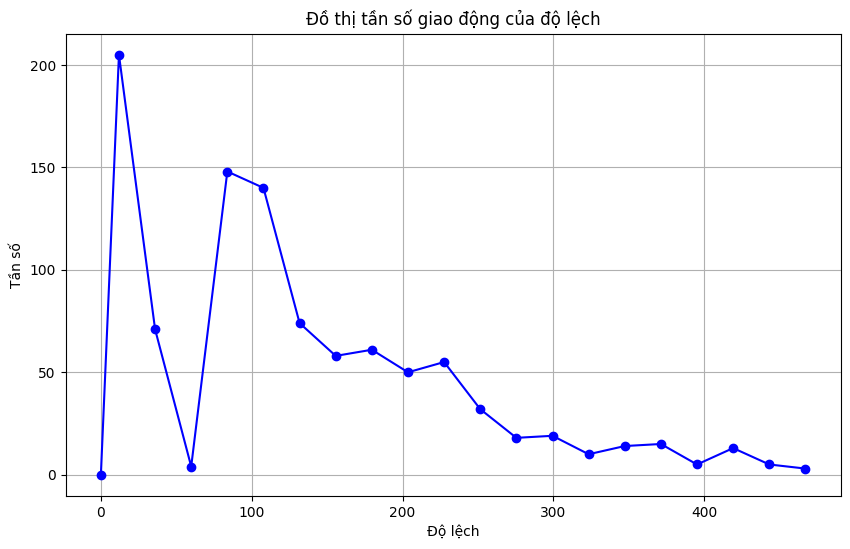

In [11]:
problem = read_file('data/15Cities-1194.txt')
original_result = 1194
deviation_list = []

for _ in range(1000): 
    distance = solve(problem)[0]
    deviation_list.append(calculate_deviation(original_result, distance))

plot_deviation_frequency(deviation_list,bins = 20)

**26 Cities - 937**

Kết quả có độ chính xác thấp với chỉ 5,5% có độ lệch dưới 100. Độ lệch cao nhất trong khoảng từ 200 - 300. Đồ thị lệch về bên phải, tầng số tăng dần rồi giảm.

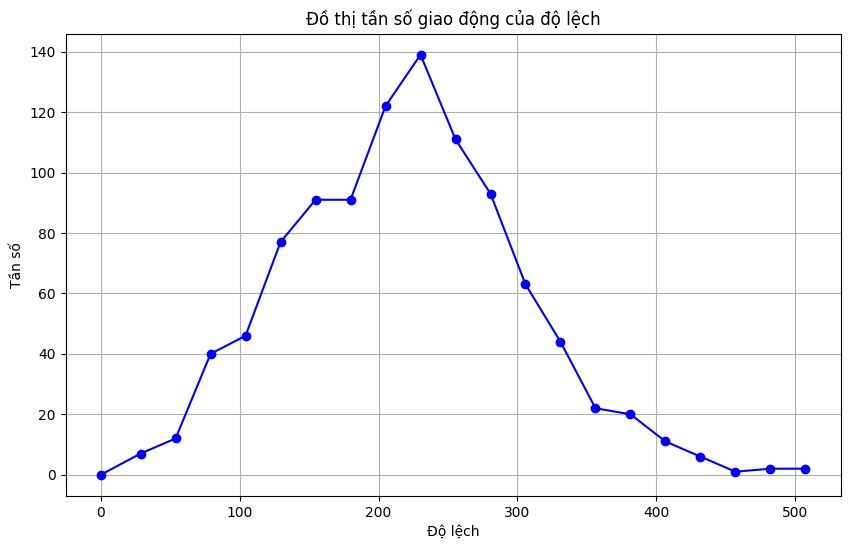

In [12]:
problem = read_file('data/26Cities-937.txt')
original_result = 937
deviation_list = []

for _ in range(1000): 
    distance = solve(problem)[0]
    deviation_list.append(calculate_deviation(original_result, distance))

plot_deviation_frequency(deviation_list,bins =20)

**42 Citise - 699**

Kết quả có độ lệch cao. Chỉ có 1,5% kết quả có độ lệch dưới 400. Độ lệch nhiều nhất là 600 với 120/1000 kết quả. Đồ thị lệch về bên phải.

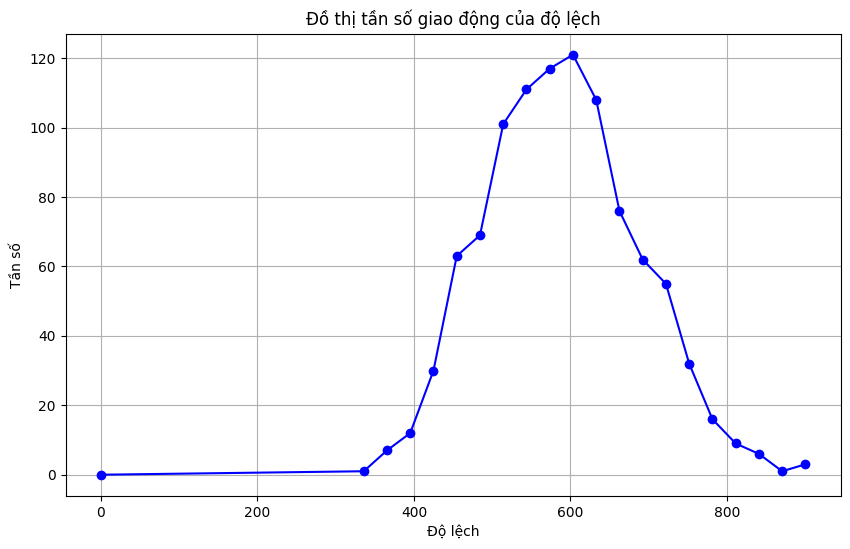

In [13]:
problem = read_file('data/42Cities-699.txt')
original_result = 699
deviation_list = []

for _ in range(1000): 
    distance = solve(problem)[0]
    deviation_list.append(calculate_deviation(original_result, distance))

plot_deviation_frequency(deviation_list,bins=20)

**48 Cities - 33523**

Đáp án có độ lệch cao > 20000. Độ lệch cao nhất nằm trong khoản từ 30000 đến 40000 chiêm 80%.

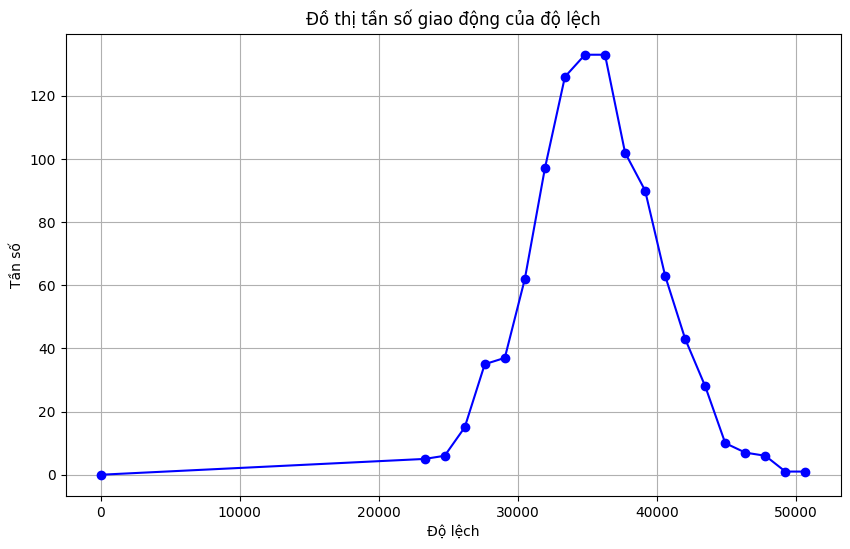

In [14]:
problem = read_file('data/48Cities-33523.txt')
original_result = 33523
deviation_list = []

for _ in range(1000): 
    distance = solve(problem)[0]
    deviation_list.append(calculate_deviation(original_result, distance))

plot_deviation_frequency(deviation_list,bins =20)